In [3]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re
%matplotlib inline

## Fetching population data from Wikipedia

In this lab we will fetch data about countries and their population from Wikipedia.

http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population has several tables for individual countries, subcontinents as well as different years. We will combine the data for all countries and all years in a single panda dataframe and visualize the change in population for different countries.

### We will go through the following steps:
* fetching html with embedded data
* parsing html to extract the data
* collecting the data in a panda dataframe
* displaying the data

Let's start

## Fetching the Wikipedia site

In [4]:
# url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
# website_html = requests.get(url).text
# print website_html
with open("./List of countries by past and future population - Wikipedia.html") as f:
    website_html  = f.read()

## Parsing html data

In [5]:
#extract all tables...
import bs4 #this is beautiful soup
def extract_tables(html):
    "The functions extracts all the tables and return a list, with each item containing the html for a table."
    # YOUR CODE HERE
    list_of_tables = []
    soup = bs4.BeautifulSoup(html,"lxml")
    tables = soup.findAll('table')
    count = 0
    for table in tables:
        if count == 3:
            break
        count=count+1
        list_of_tables.append(table)
    return list_of_tables

In [6]:
from nose.tools import assert_equal
with open("./List of countries by past and future population - Wikipedia.html") as f:
    website_html  = f.read()

assert_equal( len(extract_tables(website_html)), 3)
assert_equal(len(extract_tables("Test")), 0)
assert_equal(len(extract_tables(r'<table class="sortable wikitable jquery-tablesorter" style="text-align: right"><tr><th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">Country (or dependent territory)</th><th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">1950</th></tr></table>')), 1)

In [254]:
def tables_to_dict(tables):
    """ 
    Make a dictionary of dictionaries, where in outer dictionary, use country name as key,
    and in inner dictionary use year as key and population as value (as number),
    and after reading each table we will update internal dictionary so that in the end it will 
    data of all the years
    """
    # YOUR CODE HERE
    dictionary_country={}
    list_of_years=[]
    for table in tables:
        for a_table in table.findAll('a'):
            if 'World' == u''.join(a_table.contents[0]).encode('utf-8').strip():
                continue
            dictionary_country[ u''.join(a_table.contents[0]).encode('utf-8').strip()]={}
    for table in tables:
        for th_table in table.findAll('th'):
            year = u''.join(th_table.contents[0]).encode('utf-8').strip()
            try:
                i = int(year)
                list_of_years.append(i)
            except ValueError:
                continue
    for items in dictionary_country.iteritems():
        for years in list_of_years:
            if items[1].get(years) == None:
                items[1][years] = 0
    for table in enumerate(tables):
        for tr_table in table[1].findAll('tr'):
            for td_table in enumerate(tr_table.findAll('td')):
                if td_table[1].a != None:
                    country = u''.join(td_table[1].a.contents[0]).encode('utf-8').strip()
                if country == 'World':
                    continue
                if table[0] == 0 and (td_table[0]%2 != 0 and td_table[0] != 1):
                    skip_count += 1
                elif table[0] == 0 and td_table[0] != 0:
                    dictionary_country[country][list_of_years[td_table[0]-skip_count-1]] = u''.join(td_table[1].contents[0]).encode('utf-8').strip()
                if table[0] == 1 and (td_table[0]%2 != 0 and td_table[0] != 1):
                    skip_count += 1
                elif table[0] == 1 and td_table[0] != 0 and td_table[0] != 14:
                    dictionary_country[country][list_of_years[td_table[0]+7-skip_count-1]] = u''.join(td_table[1].contents[0]).encode('utf-8').strip()
                if table[0] == 2 and (td_table[0]%2 == 0 and td_table[0] != 1):
                    skip_count += 1
                elif table[0] == 2 and td_table[0] != 0:
                    dictionary_country[country][list_of_years[td_table[0]+14-skip_count]] = u''.join(td_table[1].contents[0]).encode('utf-8').strip()
            skip_count = 0;
    return dictionary_country

In [257]:
tables = extract_tables(website_html)
country_data = tables_to_dict(tables)
print country_data

{'Canada': {1985: '25,942', 2050: '41,136', 1955: '16,051', 2020: '36,388', 1990: '1.07', 1960: '18,267', 2025: '37,559', 1995: '1.39', 1965: '20,072', 2030: '38,565', 2000: '1.33', 1970: '21,750', 2035: '39,396', 2005: '0.93', 1975: '23,210', 2040: '40,071', 2010: '0.81', 1980: '24,594', 2045: '40,636', 1950: '14,012', 2015: '0.83'}, 'Saint Martin': {1985: '16', 2050: '35', 1955: '4', 2020: '33', 1990: '15.22', 1960: '5', 2025: '34', 1995: '14.31', 1965: '5', 2030: '34', 2000: '1.72', 1970: '6', 2035: '34', 2005: '-2.80', 1975: '7', 2040: '35', 2010: '-0.34', 1980: '8', 2045: '35', 1950: '3', 2015: '1.62'}, 'Guernsey': {1985: '56', 2050: '67', 1955: '47', 2020: '68', 1990: '0.67', 1960: '47', 2025: '68', 1995: '2.57', 1965: '51', 2030: '69', 2000: '-0.53', 1970: '54', 2035: '68', 2005: '0.32', 1975: '54', 2040: '68', 2010: '0.38', 1980: '54', 2045: '68', 1950: '46', 2015: '0.51'}, 'Lithuania': {1985: '3,588', 2050: '1,802', 1955: '2,615', 2020: '2,732', 1990: '0.87', 1960: '2,765', 20

In [258]:
from nose.tools import assert_equal, assert_items_equal
tables = extract_tables(website_html)
country_data = tables_to_dict(tables)

assert_equal(len(country_data.keys()), 227 )
for k in country_data.keys():
    assert_items_equal(country_data[k].keys(), [1985, 2050, 1955, 2020, 1990, 1960, 2025, 1995, 1965, 2030, 2000, 1970, 2035, 2005, 1975, 2040, 2010, 1980, 2045, 1950, 2015])
    
assert_equal( sum(country_data["Pakistan"].values()) , 3268251)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

## Creating a dataframe from a dictionary

In [219]:
# create dataframe named df
df = pd.DataFrame.from_dict(country_data, orient='index')
# sort based on year
df
# df.sort(axis=1,inplace=True)

,1990,1985,1995,2040,1980,2050,1965,1975,2030,1960,...,1970,1955,2025,2000,2045,2020,1950,2005,2015,2010
Afghanistan,1.76,"4,856,463",1.72,"8,925,950","4,451,363","9,408,142","3,350,426","4,089,084","8,340,607","3,043,002",...,"3,712,698","2,782,099","8,006,581",1.51,"9,180,226","7,643,403","2,557,629",1.33,1.19,1.23
Albania,1.76,"4,856,463",1.72,"8,925,950","4,451,363","9,408,142","3,350,426","4,089,084","8,340,607","3,043,002",...,"3,712,698","2,782,099","8,006,581",1.51,"9,180,226","7,643,403","2,557,629",1.33,1.19,1.23
Algeria,1.76,"4,856,463",1.72,"8,925,950","4,451,363","9,408,142","3,350,426","4,089,084","8,340,607","3,043,002",...,"3,712,698","2,782,099","8,006,581",1.51,"9,180,226","7,643,403","2,557,629",1.33,1.19,1.23
American Samoa,1.76,"4,856,463",1.72,"8,925,950","4,451,363","9,408,142","3,350,426","4,089,084","8,340,607","3,043,002",...,"3,712,698","2,782,099","8,006,581",1.51,"9,180,226","7,643,403","2,557,629",1.33,1.19,1.23
Andorra,1.76,"4,856,463",1.72,"8,925,950","4,451,363","9,408,142","3,350,426","4,089,084","8,340,607","3,043,002",...,"3,712,698","2,782,099","8,006,581",1.51,"9,180,226","7,643,403","2,557,629",1.33,1.19,1.23
Angola,1.76,"4,856,463",1.72,"8,925,950","4,451,363","9,408,142","3,350,426","4,089,084","8,340,607","3,043,002",...,"3,712,698","2,782,099","8,006,581",1.51,"9,180,226","7,643,403","2,557,629",1.33,1.19,1.23
Anguilla,1.76,"4,856,463",1.72,"8,925,950","4,451,363","9,408,142","3,350,426","4,089,084","8,340,607","3,043,002",...,"3,712,698","2,782,099","8,006,581",1.51,"9,180,226","7,643,403","2,557,629",1.33,1.19,1.23
Antigua and Barbuda,1.76,"4,856,463",1.72,"8,925,950","4,451,363","9,408,142","3,350,426","4,089,084","8,340,607","3,043,002",...,"3,712,698","2,782,099","8,006,581",1.51,"9,180,226","7,643,403","2,557,629",1.33,1.19,1.23
Argentina,1.76,"4,856,463",1.72,"8,925,950","4,451,363","9,408,142","3,350,426","4,089,084","8,340,607","3,043,002",...,"3,712,698","2,782,099","8,006,581",1.51,"9,180,226","7,643,403","2,557,629",1.33,1.19,1.23
Armenia,1.76,"4,856,463",1.72,"8,925,950","4,451,363","9,408,142","3,350,426","4,089,084","8,340,607","3,043,002",...,"3,712,698","2,782,099","8,006,581",1.51,"9,180,226","7,643,403","2,557,629",1.33,1.19,1.23


## Plotting population of 4 countries

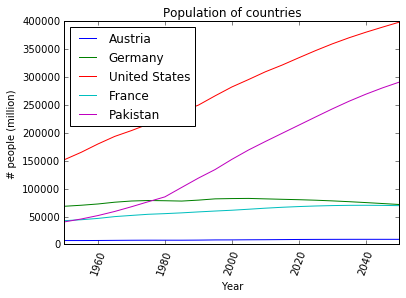

In [10]:
plotCountries = ['Austria', 'Germany', 'United States', 'France','Pakistan']

# YOUR CODE HERE
raise NotImplementedError()

## Plot 5 most populous countries from 2010 and 2060

/home/atique-minimunspecs/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


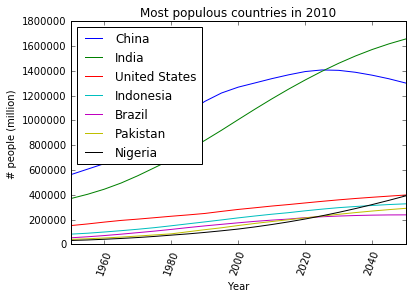

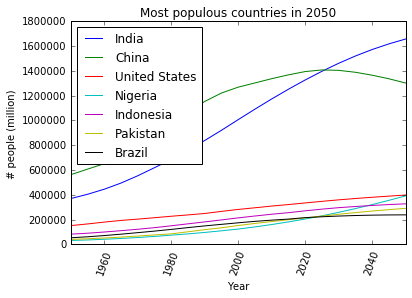

In [12]:
def plot_populous(df, year):
    # sort table depending on data value in year column
    # YOUR CODE HERE
    raise NotImplementedError()
plot_populous(df, 2010)
plt.figure()
plot_populous(df, 2050)